In [ ]:
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/CSV Dataset/2 Minutes 28 Subjects Data for Processing.csv")

In [ ]:
data.shape

(1025304, 21)

In [ ]:
data.sample(5)

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,PSS Score
248949,1.153155,0.462356,2.693555,1.363615,1.115841,-0.011338,1.049886,1.309376,1.086861,0.368934,...,1.040859,0.531494,0.20188,1.025399,0.972740,0.330487,0.013358,0.876143,0.790307,15
217586,0.949837,0.818257,0.971981,0.983106,0.872982,0.492109,0.500273,0.945262,0.868438,0.545484,...,0.889764,0.792072,0.674862,0.668322,0.707572,0.493471,0.685802,0.465433,0.464849,23
725018,0.956698,0.813162,0.892154,1.108386,0.847110,0.430457,0.23488,0.963893,1.150992,0.568893,...,1.139656,0.596528,1.032783,0.76432,0.620597,0.413804,0.869603,1.09482,0.469272,31
107752,1.324726,1.13332,1.254934,1.362763,0.929266,0.754612,0.692426,1.068046,1.323022,0.536985,...,1.341806,0.638927,0.022388,0.088796,0.779861,0.219911,-0.188322,-0.395746,0.426409,19
329601,1.569537,0.46273503,-0.013607578,0.424566,1.030953,-0.16320542,-0.5357308,0.357947,1.126052,0.24429467,...,0.479535,1.178641,-0.23415633,-0.0685683,0.476955,1.101550,-0.4310651,-0.53928035,0.131158,23


In [ ]:
data.columns

Index(['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7',
       'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8',
       'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10',
       'PSS Score'],
      dtype='object')

In [ ]:
data.dtypes

Delta_TP9     float64
Delta_AF7      object
Delta_AF8      object
Delta_TP10    float64
Theta_TP9     float64
Theta_AF7      object
Theta_AF8      object
Theta_TP10    float64
Alpha_TP9     float64
Alpha_AF7      object
Alpha_AF8      object
Alpha_TP10    float64
Beta_TP9      float64
Beta_AF7       object
Beta_AF8       object
Beta_TP10     float64
Gamma_TP9     float64
Gamma_AF7      object
Gamma_AF8      object
Gamma_TP10    float64
PSS Score       int64
dtype: object

In [ ]:
data.tail()

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,Alpha_AF7,...,Alpha_TP10,Beta_TP9,Beta_AF7,Beta_AF8,Beta_TP10,Gamma_TP9,Gamma_AF7,Gamma_AF8,Gamma_TP10,PSS Score
1025299,0.002082,-0.124669,0.397337,0.282320,0.054589,-0.702157,-0.086733,0.163435,0.81956,-0.147193,...,0.564945,0.687289,-0.027394,0.671715,0.492704,0.329745,-0.276349,0.332195,0.296686,26
1025300,-0.007930,-0.118594,0.396447,0.311001,0.054589,-0.702157,-0.086733,0.163435,0.81956,-0.147193,...,0.564945,0.687289,-0.027394,0.671715,0.492704,0.329745,-0.276349,0.332195,0.296686,26
1025301,-0.007930,-0.118594,0.396447,0.311001,0.075607,-0.659387,-0.086345,0.169441,0.81956,-0.147193,...,0.564945,0.687289,-0.027394,0.671715,0.492704,0.329745,-0.276349,0.332195,0.296686,26
1025302,-0.007930,-0.118594,0.396447,0.311001,0.075607,-0.659387,-0.086345,0.169441,0.81956,-0.147193,...,0.564945,0.687289,-0.027394,0.671715,0.492704,0.329939,-0.282883,0.318434,0.300568,26
1025303,-0.007930,-0.118594,0.396447,0.311001,0.075607,-0.659387,-0.086345,0.169441,0.81956,-0.147193,...,0.564945,0.687289,-0.027394,0.671715,0.492704,0.329939,-0.282883,0.318434,0.300568,26


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025304 entries, 0 to 1025303
Data columns (total 21 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Delta_TP9   1025304 non-null  float64
 1   Delta_AF7   1025304 non-null  object 
 2   Delta_AF8   1025304 non-null  object 
 3   Delta_TP10  1025304 non-null  float64
 4   Theta_TP9   1025304 non-null  float64
 5   Theta_AF7   1025304 non-null  object 
 6   Theta_AF8   1025304 non-null  object 
 7   Theta_TP10  1025304 non-null  float64
 8   Alpha_TP9   1025304 non-null  float64
 9   Alpha_AF7   1025304 non-null  object 
 10  Alpha_AF8   1025304 non-null  object 
 11  Alpha_TP10  1025304 non-null  float64
 12  Beta_TP9    1025304 non-null  float64
 13  Beta_AF7    1025304 non-null  object 
 14  Beta_AF8    1025304 non-null  object 
 15  Beta_TP10   1025304 non-null  float64
 16  Gamma_TP9   1025304 non-null  float64
 17  Gamma_AF7   1025304 non-null  object 
 18  Gamma_AF8   1025304 no

In [ ]:
data.describe()

,Delta_TP9,Delta_TP10,Theta_TP9,Theta_TP10,Alpha_TP9,Alpha_TP10,Beta_TP9,Beta_TP10,Gamma_TP9,Gamma_TP10,PSS Score
count,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06,1.025304e+06
mean,8.888667e-01,8.276091e-01,5.388915e-01,5.350754e-01,7.731550e-01,7.321501e-01,6.336207e-01,6.207689e-01,3.996586e-01,3.814948e-01,2.221429e+01
std,6.555932e-01,7.493722e-01,4.733851e-01,5.740761e-01,4.426019e-01,5.398660e-01,3.607875e-01,4.282777e-01,3.912496e-01,4.558694e-01,6.349115e+00
min,-7.965505e-01,-9.092255e-01,-8.658641e-01,-8.194305e-01,-3.031249e-01,-2.895044e-01,-3.067024e-01,-2.491472e-01,-7.755272e-01,-7.750586e-01,9.000000e+00
25%,4.346618e-01,3.963191e-01,2.178041e-01,1.786618e-01,4.889160e-01,4.263028e-01,3.891114e-01,3.879552e-01,1.354664e-01,9.600097e-02,1.775000e+01
50%,8.026528e-01,6.972474e-01,4.808883e-01,4.203902e-01,7.226793e-01,6.537370e-01,5.816393e-01,5.628928e-01,3.527743e-01,3.413910e-01,2.100000e+01
75%,1.214200e+00,1.106277e+00,7.840617e-01,7.259224e-01,9.837571e-01,9.101216e-01,8.356681e-01,7.386655e-01,6.430042e-01,5.731013e-01,2.650000e+01
max,3.829172e+00,4.300904e+00,2.862053e+00,3.555768e+00,3.069386e+00,3.617831e+00,2.342173e+00,2.939200e+00,1.747584e+00,2.351019e+00,3.500000e+01


In [ ]:
data.isnull().any()

Delta_TP9     False
Delta_AF7     False
Delta_AF8     False
Delta_TP10    False
Theta_TP9     False
Theta_AF7     False
Theta_AF8     False
Theta_TP10    False
Alpha_TP9     False
Alpha_AF7     False
Alpha_AF8     False
Alpha_TP10    False
Beta_TP9      False
Beta_AF7      False
Beta_AF8      False
Beta_TP10     False
Gamma_TP9     False
Gamma_AF7     False
Gamma_AF8     False
Gamma_TP10    False
PSS Score     False
dtype: bool

In [ ]:
data.isnull().sum()

Delta_TP9     0
Delta_AF7     0
Delta_AF8     0
Delta_TP10    0
Theta_TP9     0
Theta_AF7     0
Theta_AF8     0
Theta_TP10    0
Alpha_TP9     0
Alpha_AF7     0
Alpha_AF8     0
Alpha_TP10    0
Beta_TP9      0
Beta_AF7      0
Beta_AF8      0
Beta_TP10     0
Gamma_TP9     0
Gamma_AF7     0
Gamma_AF8     0
Gamma_TP10    0
PSS Score     0
dtype: int64

In [ ]:
print('Total cols : ',data.shape[1],' and total rows : ',data.shape[0])


Total cols :  21  and total rows :  1025304


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns 
color = sns.color_palette()

[Text(0.5, 1.0, 'Correlation Matrix')]

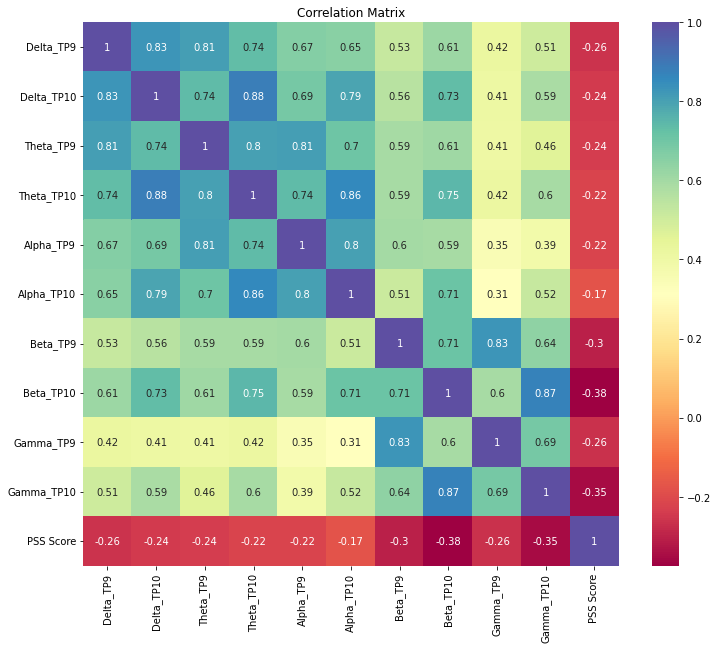

In [ ]:
# Correlation matrix
corr = data.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [ ]:
corr_matrix = data.corr().round(2)
corr_matrix              

,Delta_TP9,Delta_TP10,Theta_TP9,Theta_TP10,Alpha_TP9,Alpha_TP10,Beta_TP9,Beta_TP10,Gamma_TP9,Gamma_TP10,PSS Score
Delta_TP9,1.00,0.83,0.81,0.74,0.67,0.65,0.53,0.61,0.42,0.51,-0.26
Delta_TP10,0.83,1.00,0.74,0.88,0.69,0.79,0.56,0.73,0.41,0.59,-0.24
Theta_TP9,0.81,0.74,1.00,0.80,0.81,0.70,0.59,0.61,0.41,0.46,-0.24
Theta_TP10,0.74,0.88,0.80,1.00,0.74,0.86,0.59,0.75,0.42,0.60,-0.22
Alpha_TP9,0.67,0.69,0.81,0.74,1.00,0.80,0.60,0.59,0.35,0.39,-0.22
Alpha_TP10,0.65,0.79,0.70,0.86,0.80,1.00,0.51,0.71,0.31,0.52,-0.17
Beta_TP9,0.53,0.56,0.59,0.59,0.60,0.51,1.00,0.71,0.83,0.64,-0.30
Beta_TP10,0.61,0.73,0.61,0.75,0.59,0.71,0.71,1.00,0.60,0.87,-0.38
Gamma_TP9,0.42,0.41,0.41,0.42,0.35,0.31,0.83,0.60,1.00,0.69,-0.26
Gamma_TP10,0.51,0.59,0.46,0.60,0.39,0.52,0.64,0.87,0.69,1.00,-0.35


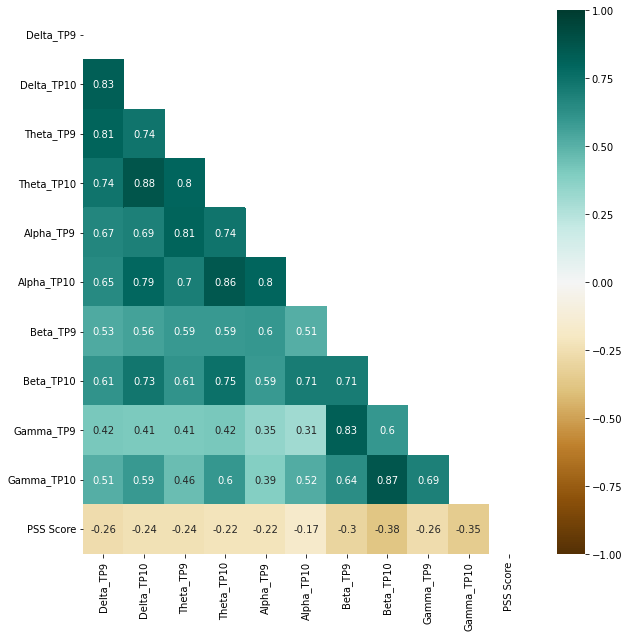

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [ ]:
data.columns

Index(['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10', 'Theta_TP9',
       'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9', 'Alpha_AF7',
       'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7', 'Beta_AF8',
       'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10',
       'PSS Score'],
      dtype='object')

In [ ]:
features = ["Delta_TP9", "Delta_TP10", "Theta_TP9", "Theta_TP10", "Alpha_TP9", "Alpha_TP10", "Beta_TP9",
            "Beta_TP10", "Gamma_TP9", "Gamma_TP10"]

In [ ]:
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  10
********************************************************************************
Categorical variables column name: ['Delta_AF7', 'Delta_AF8', 'Theta_AF7', 'Theta_AF8', 'Alpha_AF7', 'Alpha_AF8', 'Beta_AF7', 'Beta_AF8', 'Gamma_AF7', 'Gamma_AF8']


In [ ]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  11
********************************************************************************
Numerical Variables Column:  ['Delta_TP9', 'Delta_TP10', 'Theta_TP9', 'Theta_TP10', 'Alpha_TP9', 'Alpha_TP10', 'Beta_TP9', 'Beta_TP10', 'Gamma_TP9', 'Gamma_TP10', 'PSS Score']


# Feature Selection

In [ ]:
features = ["Delta_TP9", "Delta_TP10", "Theta_TP9", "Theta_TP10", "Alpha_TP9", "Alpha_TP10", "Beta_TP9",
            "Beta_TP10", "Gamma_TP9", "Gamma_TP10"]

In [ ]:
X = data[features]
y = data['PSS Score']

print(X.shape)
print(y.shape)

(1025304, 10)
(1025304,)


In [ ]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix,classification_report
from sklearn.svm import SVC
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((717712, 10), (307592, 10))

In [ ]:
accuracy = {}

#LogisticRegression

In [ ]:
model1 = LogisticRegression(max_iter = 500)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(model1)] = accuracy_score(y_test, y_pred1)*100

0.4214966579104788


In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           9       0.53      0.07      0.13     11002
          14       0.57      0.49      0.53     11127
          15       0.47      0.53      0.50     21928
          16       0.53      0.54      0.53     21959
          17       0.59      0.37      0.46     10859
          18       0.42      0.21      0.28     10982
          19       0.35      0.33      0.34     10980
          20       0.33      0.38      0.35     33054
          21       0.18      0.20      0.19     32909
          22       0.58      0.85      0.69     10988
          23       0.58      0.71      0.64     32989
          24       0.60      0.65      0.62     11048
          26       0.16      0.04      0.06     10840
          28       0.51      0.47      0.49     10987
          30       0.33      0.34      0.34     22095
          31       0.26      0.30      0.28     21893
          34       0.47      0.51      0.49     10982
          35       0.49    

In [ ]:
y_pred_test = model1.predict(X_test)
y_pred_train = model1.predict(X_train)

test1 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [ ]:
test1.sample(10)

,Actual,Y test predicted
882569,30,30
95771,19,16
418092,21,21
723975,31,20
762886,14,30
3641,16,16
684226,20,16
543706,18,20
83439,19,31
705105,31,20


#DecisionTreeClassifier

In [40]:
model2 = DecisionTreeClassifier(max_depth=18)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(model2)] = accuracy_score(y_test, y_pred2)*100

0.8581660121199511


In [41]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           9       0.94      0.74      0.83     11002
          14       0.80      0.88      0.84     11127
          15       0.95      0.91      0.93     21928
          16       0.96      0.86      0.91     21959
          17       0.70      0.75      0.72     10859
          18       0.66      0.66      0.66     10982
          19       0.84      0.80      0.82     10980
          20       0.90      0.88      0.89     33054
          21       0.71      0.85      0.77     32909
          22       1.00      1.00      1.00     10988
          23       0.89      0.89      0.89     32989
          24       0.94      0.83      0.88     11048
          26       0.81      0.65      0.72     10840
          28       0.99      0.97      0.98     10987
          30       0.95      0.89      0.92     22095
          31       0.71      0.87      0.78     21893
          34       0.99      0.89      0.93     10982
          35       0.95    

In [42]:
y_pred_test = model2.predict(X_test)
y_pred_train = model2.predict(X_train)

test2 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [43]:
test2.sample(10)

,Actual,Y test predicted
72506,21,21
551694,31,31
359656,23,23
501156,28,28
537680,18,18
927485,30,30
705771,31,21
27385,16,16
208574,23,17
158808,16,16


#RandomForestClassifier

In [44]:
model3 = RandomForestClassifier(max_depth=18)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(model3)] = accuracy_score(y_test, y_pred3)*100

0.9879970870503785


In [45]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           9       1.00      0.97      0.98     11002
          14       0.96      1.00      0.98     11127
          15       1.00      0.98      0.99     21928
          16       1.00      0.99      0.99     21959
          17       0.93      0.99      0.96     10859
          18       0.92      0.99      0.96     10982
          19       1.00      0.97      0.98     10980
          20       0.99      0.99      0.99     33054
          21       0.99      0.98      0.99     32909
          22       1.00      1.00      1.00     10988
          23       1.00      0.99      0.99     32989
          24       1.00      0.98      0.99     11048
          26       0.98      0.98      0.98     10840
          28       1.00      1.00      1.00     10987
          30       1.00      0.99      0.99     22095
          31       0.97      0.99      0.98     21893
          34       1.00      0.99      1.00     10982
          35       1.00    

In [46]:
y_pred_test = model3.predict(X_test)
y_pred_train = model3.predict(X_train)

test3 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [47]:
test3.sample(10)

,Actual,Y test predicted
1022709,26,26
20917,16,16
626132,24,24
333287,23,23
146868,16,16
60706,21,21
178601,16,16
277510,23,23
65210,21,21
245319,15,15


#LinearRegression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [50]:
model5 = LinearRegression()
model5.fit(X_train, y_train)
y_pred5 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(model5)] = accuracy_score(y_test, y_pred2)*100

0.8581660121199511


In [51]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           9       0.94      0.74      0.83     11002
          14       0.80      0.88      0.84     11127
          15       0.95      0.91      0.93     21928
          16       0.96      0.86      0.91     21959
          17       0.70      0.75      0.72     10859
          18       0.66      0.66      0.66     10982
          19       0.84      0.80      0.82     10980
          20       0.90      0.88      0.89     33054
          21       0.71      0.85      0.77     32909
          22       1.00      1.00      1.00     10988
          23       0.89      0.89      0.89     32989
          24       0.94      0.83      0.88     11048
          26       0.81      0.65      0.72     10840
          28       0.99      0.97      0.98     10987
          30       0.95      0.89      0.92     22095
          31       0.71      0.87      0.78     21893
          34       0.99      0.89      0.93     10982
          35       0.95    

In [52]:
y_pred_test = model5.predict(X_test)
y_pred_train = model5.predict(X_train)

test5 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [53]:
test5.sample(10)

,Actual,Y test predicted
97109,19,23.786937
515394,18,25.625001
339384,23,22.074502
884974,30,24.155073
179839,16,22.480202
405881,21,19.507237
98892,19,24.279718
736498,14,21.056462
633260,24,27.298165
224325,15,22.990449


#KNeighborsClassifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(10)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)
print(accuracy_score(y_test, y_pred4))
accuracy[str(model4)] = accuracy_score(y_test, y_pred4)*100

0.9992587583552238


In [55]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           9       1.00      1.00      1.00     11002
          14       1.00      1.00      1.00     11127
          15       1.00      1.00      1.00     21928
          16       1.00      1.00      1.00     21959
          17       1.00      1.00      1.00     10859
          18       1.00      1.00      1.00     10982
          19       1.00      1.00      1.00     10980
          20       1.00      1.00      1.00     33054
          21       1.00      1.00      1.00     32909
          22       1.00      1.00      1.00     10988
          23       1.00      1.00      1.00     32989
          24       1.00      1.00      1.00     11048
          26       1.00      1.00      1.00     10840
          28       1.00      1.00      1.00     10987
          30       1.00      1.00      1.00     22095
          31       1.00      1.00      1.00     21893
          34       1.00      1.00      1.00     10982
          35       1.00    

In [56]:
y_pred_test = model4.predict(X_test)
y_pred_train = model4.predict(X_train)

test4 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [57]:
test4.sample(10)

,Actual,Y test predicted
142737,35,35
381318,20,20
807475,15,15
894646,30,30
353290,23,23
867943,34,34
611673,17,17
761005,14,14
690903,20,20
633497,24,24


#ANN_Architecture

In [70]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
network = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
network.add(Dense(units=50, input_dim=10, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
network.add(Dense(units=50, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
network.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
network.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
network.fit(X_train, y_train ,batch_size = 120, epochs = 100, verbose=1)


Epoch 1/100
5981/5981 [==============================] - 14s 2ms/step - loss: 49.5292
Epoch 2/100
5981/5981 [==============================] - 13s 2ms/step - loss: 40.3217
Epoch 3/100
5981/5981 [==============================] - 13s 2ms/step - loss: 40.3229
Epoch 4/100
5981/5981 [==============================] - 13s 2ms/step - loss: 40.3185
Epoch 5/100
5981/5981 [==============================] - 15s 3ms/step - loss: 40.3216
Epoch 6/100
5981/5981 [==============================] - 14s 2ms/step - loss: 40.3212
Epoch 7/100
5981/5981 [==============================] - 14s 2ms/step - loss: 40.3222
Epoch 8/100
5981/5981 [==============================] - 13s 2ms/step - loss: 40.3221
Epoch 9/100
5981/5981 [==============================] - 13s 2ms/step - loss: 24.3392
Epoch 10/100
5981/5981 [==============================] - 13s 2ms/step - loss: 19.2881
Epoch 11/100
5981/5981 [==============================] - 13s 2ms/step - loss: 17.3639
Epoch 12/100
5981/5981 [============================

In [72]:
network.save("ann_model.h5")

In [81]:
y_pred = network.predict(X_test, verbose=0)
y_pred.shape

(307592, 1)

In [82]:
# From categorical outputs to discrete values

y_pred_ = [np.argmax(y) for y in y_pred]
y_test_ = [np.argmax(y) for y in y_test]

from sklearn.metrics import classification_report
print(classification_report(y_test_, y_pred_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    307592

    accuracy                           1.00    307592
   macro avg       1.00      1.00      1.00    307592
weighted avg       1.00      1.00      1.00    307592



In [83]:
accuracy

{'LogisticRegression(max_iter=500)': 42.14966579104788,
 'LogisticRegression()': 42.29401284818851,
 'LogisticRegression(max_iter=1000)': 42.14966579104788,
 'DecisionTreeClassifier(max_depth=18)': 85.81660121199512,
 'RandomForestClassifier(max_depth=18)': 98.79970870503784,
 'LinearRegression()': 85.81660121199512,
 'KNeighborsClassifier(n_neighbors=10)': 99.92587583552238}

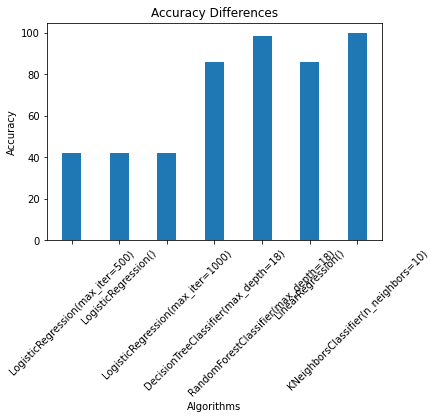

In [84]:
algos = list(accuracy.keys())
accu_val = list(accuracy.values())

plt.bar(algos, accu_val, width=0.4)
plt.title('Accuracy Differences')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()
